In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
import community.community_louvain as cl

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import numpy as np
import pandas as pd
import copy
import pickle

import time
from tqdm import tqdm

# Sub Group Dataset 불러오기

### sub_group_wheat

In [ ]:
# louvain algorithm으로 partition한 cluster dataset "sub_group_wheat"를 불러옴
with open('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Louvain_Analysis/pickles/sub_group_wheat.pkl', 'rb') as f:
  sub_group_wheat = pickle.load(f)

In [ ]:
type(sub_group_wheat)

dict

In [ ]:
# test
sub_group_wheat['2021']['1']

,Year,From,To,Trade Value (US$)
29284,2021,"Areas, nes",Armenia,120460
29286,2021,"Areas, nes",Croatia,16197
29287,2021,"Areas, nes",Netherlands,9286297
29288,2021,"Areas, nes",Rep. of Moldova,175140
29303,2021,Armenia,Georgia,1192053
...,...,...,...,...
30479,2021,Spain,Iraq,575277
30480,2021,Spain,Italy,15657312
30482,2021,Spain,Luxembourg,127413
30485,2021,Spain,Netherlands,1299462


### partial_groups

In [ ]:
with open('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Louvain_Analysis/pickles/partial_groups.pkl', 'rb') as f:
  partial_groups = pickle.load(f)

In [ ]:
type(partial_groups)

dict

In [ ]:
partial_groups['2021'] # 나누어진 그룹과 그룹수를 담는 dictionary

{'0': ['Uzbekistan', 'Kyrgyzstan', 'Afghanistan', 'Tajikistan'],
 '1': ['Hungary',
  'Netherlands',
  'Areas, nes',
  'Armenia',
  'Croatia',
  'Rep. of Moldova',
  'Italy',
  'Spain',
  'Georgia',
  'Russian Federation',
  'Austria',
  'Azerbaijan',
  'Cyprus',
  'Czechia',
  'Greece',
  'Luxembourg',
  'Montenegro',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'Bulgaria',
  'France',
  'Bosnia Herzegovina',
  'Israel',
  'Tunisia',
  'Albania',
  'North Macedonia',
  'Curaçao',
  'Other Europe, nes',
  'Grenada',
  'Iraq',
  'Malta',
  'Gibraltar'],
 '2': ['Algeria',
  'United Kingdom',
  'Angola',
  'Kenya',
  'Poland',
  'Finland',
  'Mauritius',
  'Mozambique',
  'Nigeria',
  'Saudi Arabia',
  'South Africa',
  'Belarus',
  'Denmark',
  'Germany',
  'Lithuania',
  'Sweden',
  'Kazakhstan',
  'Norway',
  'Iceland',
  'Ireland',
  'Morocco',
  'Portugal',
  'Suriname',
  'Cuba',
  'Ghana',
  'Haiti',
  'Latvia',
  'Namibia',
  'Benin',
  'Estonia',
  'Faeroe Isds',
  'Greenland',
  'Bo

In [ ]:
partial_groups['2021']['group_number'] # 총 그룹 수

6

### wheat (그래프)

In [ ]:
with open('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Louvain_Analysis/pickles/wheat.pkl', 'rb') as f:
  wheat = pickle.load(f)

In [ ]:
wheat

{'2006': <networkx.classes.digraph.DiGraph at 0x7f56fb0f5fd0>,
 '2007': <networkx.classes.digraph.DiGraph at 0x7f56fb00d810>,
 '2008': <networkx.classes.digraph.DiGraph at 0x7f56fb00db50>,
 '2009': <networkx.classes.digraph.DiGraph at 0x7f56faeed090>,
 '2010': <networkx.classes.digraph.DiGraph at 0x7f56faeed410>,
 '2011': <networkx.classes.digraph.DiGraph at 0x7f56faeed810>,
 '2012': <networkx.classes.digraph.DiGraph at 0x7f56faeed990>,
 '2013': <networkx.classes.digraph.DiGraph at 0x7f56faeedb10>,
 '2014': <networkx.classes.digraph.DiGraph at 0x7f56faeedc10>,
 '2015': <networkx.classes.digraph.DiGraph at 0x7f56faeedd90>,
 '2016': <networkx.classes.digraph.DiGraph at 0x7f56faeede90>,
 '2017': <networkx.classes.digraph.DiGraph at 0x7f56faeedfd0>,
 '2018': <networkx.classes.digraph.DiGraph at 0x7f56fa9a5110>,
 '2019': <networkx.classes.digraph.DiGraph at 0x7f56fa9a5210>,
 '2020': <networkx.classes.digraph.DiGraph at 0x7f56fa9a5350>,
 '2021': <networkx.classes.digraph.DiGraph at 0x7f56fa9

# Graph making (Sub Groups)

In [ ]:
startYear = 2011
endYear = 2021

max_iter = {}
for year in range(startYear, endYear+1):
  max_iter[str(year)] = partial_groups[str(year)]['group_number']
  print("{}년 군집 수 :".format(year)+str(max_iter[str(year)]))

2011년 군집 수 :5
2012년 군집 수 :6
2013년 군집 수 :5
2014년 군집 수 :6
2015년 군집 수 :5
2016년 군집 수 :5
2017년 군집 수 :5
2018년 군집 수 :6
2019년 군집 수 :4
2020년 군집 수 :4
2021년 군집 수 :6


In [ ]:
# Dataset     : sub_group_wheat['year']['group_number']
# Graph       : subGraph['year']['group_number']
# # of Groups : max_iter['year']

subGraph = {}

# for year in range(startYear, endYear+1):
for year in range(startYear, endYear+1):
    
    subGraph[str(year)] = {}

    for number in range(max_iter[str(year)]):
      # making graph
      subGraph[str(year)][str(number)] = nx.from_pandas_edgelist(
          sub_group_wheat[str(year)][str(number)], source='From', target='To', 
          edge_attr='Trade Value (US$)', create_using=nx.DiGraph()) # Directed Graph

      print(f'SubGraph {number} of {year} : {nx.info(subGraph[str(year)][str(number)])}')

SubGraph 0 of 2011 : DiGraph with 51 nodes and 538 edges
SubGraph 1 of 2011 : DiGraph with 51 nodes and 209 edges
SubGraph 2 of 2011 : DiGraph with 40 nodes and 89 edges
SubGraph 3 of 2011 : DiGraph with 40 nodes and 129 edges
SubGraph 4 of 2011 : DiGraph with 14 nodes and 17 edges
SubGraph 0 of 2012 : DiGraph with 52 nodes and 533 edges
SubGraph 1 of 2012 : DiGraph with 53 nodes and 155 edges
SubGraph 2 of 2012 : DiGraph with 16 nodes and 27 edges
SubGraph 3 of 2012 : DiGraph with 15 nodes and 29 edges
SubGraph 4 of 2012 : DiGraph with 14 nodes and 22 edges
SubGraph 5 of 2012 : DiGraph with 46 nodes and 163 edges
SubGraph 0 of 2013 : DiGraph with 52 nodes and 540 edges
SubGraph 1 of 2013 : DiGraph with 39 nodes and 58 edges
SubGraph 2 of 2013 : DiGraph with 25 nodes and 73 edges
SubGraph 3 of 2013 : DiGraph with 31 nodes and 91 edges
SubGraph 4 of 2013 : DiGraph with 49 nodes and 168 edges
SubGraph 0 of 2014 : DiGraph with 63 nodes and 580 edges
SubGraph 1 of 2014 : DiGraph with 18 no

# Sub Group Outdegree

## Outdegree

weight를 부여한 실질적 영향력을 확인한다. 

In [ ]:
print(wheat['2021'].out_degree(weight='Trade Value (US$)'))
print(np.array(wheat['2021'].out_degree(weight='Trade Value (US$)'))[:,1])
print(wheat['2021'].nodes())

[('Algeria', 13590), ('Hungary', 1186479698), ('Switzerland', 3161709), ('USA', 10856024006), ('United Kingdom', 130551323), ('Angola', 117), ('Netherlands', 193191638), ('Areas, nes', 9728393), ('Armenia', 1272496), ('Aruba', 0), ('Croatia', 254004004), ('Rep. of Moldova', 382304042), ('Argentina', 470574916), ('Bolivia (Plurinational State of)', 0), ('Canada', 9334083540), ('Chile', 6291), ('Ecuador', 4), ('Italy', 146941699), ('Kenya', 464898), ('Pakistan', 0), ('Poland', 1314009276), ('Spain', 217307298), ('United Rep. of Tanzania', 268342), ('Belgium', 299726538), ('Georgia', 393070), ('Russian Federation', 2986861606), ('Australia', 8629744921), ('Bahrain', 0), ('Bangladesh', 0), ('Burundi', 0), ('China', 389622), ('China, Hong Kong SAR', 7460), ('China, Macao SAR', 0), ('Egypt', 16661), ('Fiji', 0), ('Finland', 20520550), ('French Polynesia', 0), ('India', 1827336257), ('Indonesia', 844), ('Japan', 456), ('Kuwait', 0), ("Lao People's Dem. Rep.", 0), ('Madagascar', 0), ('Malawi',

In [ ]:
a = np.array(list(dict(wheat['2021'].out_degree(weight='Trade Value (US$)')).values()))
# a + 1

In [ ]:
# subGraph['year']['group_number'].out_degree(weight=1)
# subGraph['year']['group_number'].out_degree(weight='Trade Value (US$)')
# subGraph['2021']['0'].out_degree # dictionary with {'Country': # of out_degree}

# dictionary that contains all countires
all_countries = {}
sub_total_trade_values = {}
dependent_countries = {}
non_dependent_countries = {}

for year in range(startYear, endYear+1):
  all_countries[str(year)] = {}
  sub_total_trade_values[str(year)] = {}
  dependent_countries[str(year)] = {}
  non_dependent_countries[str(year)] = {}

  for number in range(max_iter[str(year)]):
    all_countries[str(year)][str(number)] = list(subGraph[str(year)][str(number)].nodes)
    sub_total_trade_values[str(year)][str(number)] = sub_group_wheat[str(year)][str(number)]['Trade Value (US$)'].sum()
    # 군집 내 총 수출량의 10% 미만 
    dependent_countries[str(year)][str(number)] = [
    country for country, out_degrees in subGraph[str(year)][str(number)].out_degree(weight='Trade Value (US$)') if out_degrees <= sub_total_trade_values[str(year)][str(number)]/10                            
    ]
    non_dependent_countries[str(year)][str(number)] = [item for item in all_countries[str(year)][str(number)] if item not in dependent_countries[str(year)][str(number)]]


In [ ]:

def powerfulSuppliers(year):
  iter = 0
  while True:
    if iter == max_iter[str(year)]:
      break
    print("{}년 {}번 그룹의 밀 주요 공급국 : ".format(year, iter), non_dependent_countries[str(year)][str(iter)], '\n')
    iter +=1 

In [ ]:
# test
powerfulSuppliers(2021)

2021년 0번 그룹의 밀 주요 공급국 :  ['Uzbekistan'] 

2021년 1번 그룹의 밀 주요 공급국 :  ['Russian Federation', 'Hungary', 'France'] 

2021년 2번 그룹의 밀 주요 공급국 :  ['Lithuania', 'Poland', 'Germany', 'Latvia'] 

2021년 3번 그룹의 밀 주요 공급국 :  ['Canada', 'USA'] 

2021년 4번 그룹의 밀 주요 공급국 :  ['Romania', 'Ukraine'] 

2021년 5번 그룹의 밀 주요 공급국 :  ['Australia'] 



### Rep. of Korea 확인

In [ ]:
# startYear = 2011
# endYear = 2021

for year in tqdm(range(startYear, endYear+1), desc="Rep. of Korea가 속한 그룹 확인하기", mininterval=0.01):

  
  tmp_iter = max_iter[str(year)]

  for iter in range(tmp_iter):

    if 'Rep. of Korea' in list(subGraph[str(year)][str(iter)].nodes):
      print(f"\n In {year}, Rep. of Korea is in Group {iter}")


Rep. of Korea가 속한 그룹 확인하기: 100%|██████████| 11/11 [00:00<00:00, 12699.52it/s]


 In 2011, Rep. of Korea is in Group 2

 In 2012, Rep. of Korea is in Group 3

 In 2013, Rep. of Korea is in Group 3

 In 2014, Rep. of Korea is in Group 3

 In 2015, Rep. of Korea is in Group 0

 In 2016, Rep. of Korea is in Group 3

 In 2017, Rep. of Korea is in Group 4

 In 2018, Rep. of Korea is in Group 3

 In 2019, Rep. of Korea is in Group 3

 In 2020, Rep. of Korea is in Group 1

 In 2021, Rep. of Korea is in Group 5


2021년 한국이 속한 그룹의 국가들을 확인

In [ ]:
kor2021 = set(list(subGraph['2021']['5'].nodes))
kor2020 = set(list(subGraph['2020']['1'].nodes))

diff_2021_2020 = kor2021 - kor2020
same_2021_2020 = kor2021 - diff_2021_2020
same_2021_2020

{'Australia',
 'Bahrain',
 'Bhutan',
 'Brunei Darussalam',
 'China',
 'China, Hong Kong SAR',
 "Côte d'Ivoire",
 'Equatorial Guinea',
 'Fiji',
 'French Polynesia',
 'India',
 'Kuwait',
 "Lao People's Dem. Rep.",
 'Madagascar',
 'Malaysia',
 'Maldives',
 'Myanmar',
 'New Caledonia',
 'New Zealand',
 'Other Asia, nes',
 'Papua New Guinea',
 'Philippines',
 'Qatar',
 'Rep. of Korea',
 'Seychelles',
 'Singapore',
 'Solomon Isds',
 'Somalia',
 'Thailand'}

================================

## Sub Group Centrality analysis

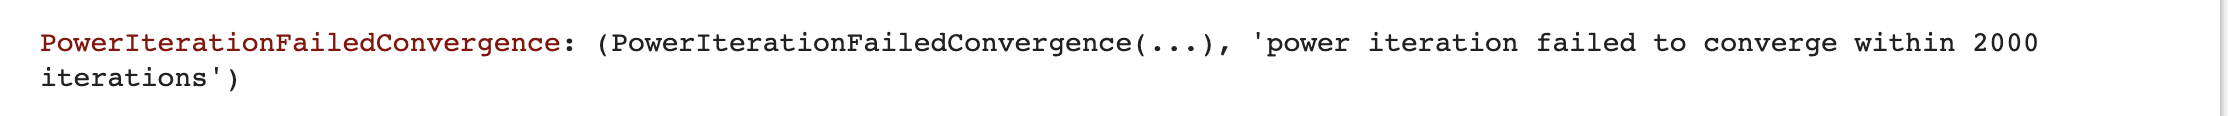

max_iter 값을 2,000에서 더 큰 값으로 지정해주었다.

In [ ]:
# # test
# for u, v, d in subGraph['2013']['1'].edges(data=True):
#   print(f"u : {u}")
#   print(f"v : {v}")
#   print(f"d : {d}")

u : Areas, nes
v : Aruba
d : {'Trade Value (US$)': 730}
u : Barbados
v : Grenada
d : {'Trade Value (US$)': 75863}
u : Benin
v : Burkina Faso
d : {'Trade Value (US$)': 1073069}
u : Benin
v : Niger
d : {'Trade Value (US$)': 1251650}
u : Curaçao
v : Aruba
d : {'Trade Value (US$)': 302}
u : Curaçao
v : Montserrat
d : {'Trade Value (US$)': 18}
u : Côte d'Ivoire
v : Areas, nes
d : {'Trade Value (US$)': 195}
u : Côte d'Ivoire
v : Niger
d : {'Trade Value (US$)': 77548}
u : Dominican Rep.
v : Aruba
d : {'Trade Value (US$)': 28378}
u : Dominican Rep.
v : Curaçao
d : {'Trade Value (US$)': 111}
u : Dominican Rep.
v : Trinidad and Tobago
d : {'Trade Value (US$)': 17}
u : Dominican Rep.
v : USA
d : {'Trade Value (US$)': 1674}
u : USA
v : Antigua and Barbuda
d : {'Trade Value (US$)': 401}
u : USA
v : Aruba
d : {'Trade Value (US$)': 1263}
u : USA
v : Bahamas
d : {'Trade Value (US$)': 114}
u : USA
v : Barbados
d : {'Trade Value (US$)': 6965907}
u : USA
v : Belize
d : {'Trade Value (US$)': 8267145}
u : 

### return_centralities_as_dict()

In [ ]:
from networkx.algorithms.centrality.eigenvector import eigenvector_centrality
def return_centralities_as_dict(input_g):
    # weighted degree centrality를 딕셔너리로 리턴
    def return_weighted_degree_centrality(input_g, normalized=False):
        w_d_centrality = {n:0.0 for n in input_g.nodes()} # initialize
        for u, v, d in input_g.edges(data=True):
            w_d_centrality[u]+=d['Trade Value (US$)']
            w_d_centrality[v]+=d['Trade Value (US$)']
        if normalized==True:
            weighted_sum = sum(w_d_centrality.values())
            return {k:v/weighted_sum for k, v in w_d_centrality.items()}
        else:
            return w_d_centrality

    def return_eigenvector_centrality(input_g):
        return nx.eigenvector_centrality(input_g, weight='Trade Value (US$)', max_iter=100000000000000) 
        # max_iter는 default 100으로 설정되어 미지정시 PowerIterationFailedConvergence 에러가 발생

    return {
        'weighted_deg':return_weighted_degree_centrality(input_g),
        'eigenvector_cent':return_eigenvector_centrality(input_g)
    }

In [ ]:
# # 계산 시 5시간 30분 소요
# cenInfo = {}
# # cenInfoLst = {}

# for year in tqdm(range(startYear, endYear+1), desc="연도별 특정 클러스터 내의 centrality 계산", mininterval=0.01):
#     cenInfo[str(year)] = {}
#     # cenInfoLst[str(year)] = {}
    
#     for number in tqdm(range(max_iter[str(year)]), desc="{}년도의 Sub Group centrality 계산".format(year), mininterval=0.01):
#       cenInfo[str(year)][str(number)] = {}
#       # cenInfoLst[str(year)][str(number)] = {'deg': [], 'wdeg':[], 'bet': [], 'wbet': [], 'clo': [], 'wclo': [], 'eig': [], 'weig': []}
      
#       # cenInfo[str(year)][str(number)]['deg'] = nx.degree_centrality(subGraph[str(year)][str(number)])
#       cenInfo[str(year)][str(number)]['wdeg'] = return_centralities_as_dict(subGraph[str(year)][str(number)])['weighted_deg']
#       # cenInfo[str(year)][str(number)]['bet'] = nx.betweenness_centrality(subGraph[str(year)][str(number)])
#       # cenInfo[str(year)][str(number)]['wbet'] = return_centralities_as_dict(subGraph[str(year)][str(number)])['betweenness_cent']
#       # cenInfo[str(year)][str(number)]['clo'] = nx.closeness_centrality(subGraph[str(year)][str(number)])
#       # cenInfo[str(year)][str(number)]['wclo'] = return_centralities_as_dict(subGraph[str(year)][str(number)])['closeness_cent']
#       # cenInfo[str(year)][str(number)]['eig'] = nx.eigenvector_centrality(subGraph[str(year)][str(number)])
#       cenInfo[str(year)][str(number)]['weig'] = return_centralities_as_dict(subGraph[str(year)][str(number)])['eigenvector_cent']
      
#       # for key in cenInfo[str(year)][str(number)].keys():
#           # cenInfoLst[str(year)][str(number)][key].append(cenInfo[str(year)][str(number)][key])

2011년도의 Sub Group centrality 계산:  20%|██        | 1/5 [00:00<00:00, 19.13it/s]

{'Albania': 29588174.0, 'Serbia': 98933815.0, 'Austria': 652353808.0, 'Belgium': 745015556.0, 'Bosnia Herzegovina': 145963676.0, 'Bulgaria': 1033937527.0, 'Burkina Faso': 216.0, 'Croatia': 74297356.0, 'Czechia': 541371353.0, 'Denmark': 468544862.0, 'Germany': 1804376136.0, 'Greece': 256145126.0, 'Hungary': 388964103.0, 'Ireland': 16379980.0, 'Israel': 382980057.0, 'Italy': 1522723097.0, 'Lithuania': 354414545.0, 'Luxembourg': 16985652.0, 'Montenegro': 7093148.0, 'Netherlands': 1480466891.0, 'North Macedonia': 37311216.0, 'Poland': 171042357.0, 'Romania': 676941663.0, 'Slovakia': 262647665.0, 'Slovenia': 69854562.0, 'Spain': 1655551723.0, 'Sweden': 122939232.0, 'Switzerland': 194420665.0, 'Turkey': 740205190.0, 'Ukraine': 1238630232.0, 'Cyprus': 33903021.0, 'Norway': 152460713.0, 'Portugal': 154560230.0, 'United Kingdom': 459927527.0, 'Finland': 33545311.0, 'Malta': 8112434.0, 'Rep. of Moldova': 30863715.0, 'Belarus': 2193886.0, 'Estonia': 37720267.0, 'Faeroe Isds': 4523814.0, 'Greenlan


2011년도의 Sub Group centrality 계산:  80%|████████  | 4/5 [00:09<00:01,  1.93s/it]


{'Areas, nes': 6447058.0, 'Aruba': 192172.0, 'Ecuador': 363889329.0, 'Turks and Caicos Isds': 10969.0, 'Barbados': 8528453.0, 'USA': 4419766054.0, 'Canada': 4646168527.0, 'Chile': 256946370.0, 'China, Macao SAR': 4896.0, 'Colombia': 665987444.0, 'Costa Rica': 107740676.0, 'Cuba': 72386979.0, 'Curaçao': 40078.0, 'Dominican Rep.': 220790726.0, 'Guatemala': 16398207.0, 'Guyana': 16628317.0, 'Jamaica': 70545396.0, 'Japan': 2634341522.0, 'Mexico': 1655633433.0, 'Peru': 171427876.0, 'Rep. of Korea': 480558586.0, 'Togo': 8318803.0, 'Trinidad and Tobago': 10553.0, 'Tunisia': 42148155.0, 'Venezuela': 853181224.0, 'Panama': 51728839.0, 'Montserrat': 412.0, 'Haiti': 27353.0, 'Belize': 6898905.0, 'El Salvador': 89371748.0, 'Antigua and Barbuda': 6161.0, 'Cayman Isds': 3521.0, 'Marshall Isds': 131.0, 'FS Micronesia': 9379.0, 'Nicaragua': 41423652.0, 'Saint Vincent and the Grenadines': 10326143.0, 'Dominica': 106.0, 'Bahamas': 3565.0, 'Palau': 107.0, 'Saint Lucia': 601.0}
{'Areas, nes': 6447058.0, '

2012년도의 Sub Group centrality 계산:  17%|█▋        | 1/6 [00:00<00:00, 26.21it/s]

{'Algeria': 305901234.0, 'Romania': 939915798.0, 'Areas, nes': 899908.0, 'Rep. of Moldova': 20613757.0, 'Austria': 599743426.0, 'Belgium': 769251398.0, 'Bosnia Herzegovina': 145613941.0, 'Bulgaria': 1215957876.0, 'Croatia': 212699555.0, 'Czechia': 505690278.0, 'Denmark': 400651769.0, 'Finland': 39478876.0, 'Germany': 1841045236.0, 'Greece': 228506630.0, 'Hungary': 366800375.0, 'Ireland': 50889991.0, 'Italy': 1559364486.0, 'Libya': 72154893.0, 'Lithuania': 415151720.0, 'Luxembourg': 28604538.0, 'Malta': 22985603.0, 'Montenegro': 19601145.0, 'Netherlands': 1260360663.0, 'North Macedonia': 68549629.0, 'Poland': 194074381.0, 'Serbia': 149988683.0, 'Slovakia': 303017092.0, 'Slovenia': 72412386.0, 'Spain': 1172920852.0, 'Switzerland': 260244521.0, 'Turkey': 375174090.0, 'Belarus': 12813319.0, 'Cyprus': 46640235.0, 'Israel': 380433667.0, 'Norway': 165108936.0, 'Portugal': 109852403.0, 'Sweden': 100979658.0, 'United Kingdom': 386311809.0, 'Albania': 19370488.0, 'Cabo Verde': 1205.0, 'Estonia':


2012년도의 Sub Group centrality 계산:  33%|███▎      | 2/6 [00:02<00:05,  1.44s/it]

{'Botswana': 61041214.0, 'Namibia': 13927551.0, 'South Africa': 151123084.0, 'Eswatini': 16508832.0, 'Mozambique': 12345943.0, 'Lesotho': 38097240.0, 'Malawi': 16203.0, 'Zimbabwe': 28059653.0, 'Mauritius': 4926.0, 'Seychelles': 4968.0, 'Angola': 2098.0, 'Panama': 264.0, 'Dem. Rep. of the Congo': 1830.0, 'Special Categories': 157144.0, 'Zambia': 1966600.0, 'Saint Kitts and Nevis': 8172.0}
{'Botswana': 61041214.0, 'Namibia': 13927551.0, 'South Africa': 151123084.0, 'Eswatini': 16508832.0, 'Mozambique': 12345943.0, 'Lesotho': 38097240.0, 'Malawi': 16203.0, 'Zimbabwe': 28059653.0, 'Mauritius': 4926.0, 'Seychelles': 4968.0, 'Angola': 2098.0, 'Panama': 264.0, 'Dem. Rep. of the Congo': 1830.0, 'Special Categories': 157144.0, 'Zambia': 1966600.0, 'Saint Kitts and Nevis': 8172.0}



2012년도의 Sub Group centrality 계산:  83%|████████▎ | 5/6 [00:26<00:04,  4.53s/it]

{'Armenia': 223235853.0, 'Russian Federation': 984625787.0, 'Georgia': 279421976.0, 'Azerbaijan': 176716348.0, 'Iran': 313592984.0, 'Mongolia': 1204697.0, 'Jordan': 197764775.0, 'Kyrgyzstan': 6560.0, 'Rep. of Korea': 31260700.0, 'Tajikistan': 431460.0, 'Turkmenistan': 2044674.0, 'Ukraine': 152442079.0, 'Uzbekistan': 2135433.0, 'Br. Virgin Isds': 6.0, 'State of Palestine': 1513392.0}
{'Armenia': 223235853.0, 'Russian Federation': 984625787.0, 'Georgia': 279421976.0, 'Azerbaijan': 176716348.0, 'Iran': 313592984.0, 'Mongolia': 1204697.0, 'Jordan': 197764775.0, 'Kyrgyzstan': 6560.0, 'Rep. of Korea': 31260700.0, 'Tajikistan': 431460.0, 'Turkmenistan': 2044674.0, 'Ukraine': 152442079.0, 'Uzbekistan': 2135433.0, 'Br. Virgin Isds': 6.0, 'State of Palestine': 1513392.0}
{'Antigua and Barbuda': 2761374.0, 'Cameroon': 143948374.0, 'Central African Rep.': 1019.0, "Côte d'Ivoire": 197911338.0, 'Burkina Faso': 352.0, 'Mali': 55769836.0, 'France': 522785980.0, 'Congo': 14051799.0, 'Lebanon': 8893.0, 


2013년도의 Sub Group centrality 계산:  20%|██        | 1/5 [00:00<00:00, 25.06it/s]

{'Albania': 41243773.0, 'Italy': 1959878391.0, 'Serbia': 366421226.0, 'Algeria': 1790784952.0, 'Austria': 653065866.0, 'Belgium': 1411314343.0, 'Bosnia Herzegovina': 107191524.0, 'Bulgaria': 1171381104.0, 'Chile': 29482.0, 'Croatia': 181592449.0, 'Czechia': 510028244.0, 'Denmark': 350286547.0, 'Estonia': 79745324.0, 'France': 4155054144.0, 'Germany': 1967978757.0, 'Greece': 175467450.0, 'Hungary': 416420862.0, 'Ireland': 43331489.0, 'Lithuania': 252931613.0, 'Luxembourg': 47302050.0, 'Malta': 30798157.0, 'Montenegro': 22891448.0, 'Netherlands': 1849077379.0, 'North Macedonia': 36699205.0, 'Poland': 208061562.0, 'Portugal': 77364205.0, 'Romania': 900159419.0, 'Slovakia': 295971717.0, 'Slovenia': 92743576.0, 'Spain': 1344846268.0, 'Sweden': 91197769.0, 'Switzerland': 225332169.0, 'United Kingdom': 248869295.0, 'Cyprus': 52968270.0, 'Finland': 19983498.0, 'Israel': 396665788.0, 'Mauritania': 98239703.0, 'New Caledonia': 20699.0, 'Norway': 175015274.0, 'Suriname': 273501.0, 'Morocco': 6927


2013년도의 Sub Group centrality 계산:  40%|████      | 2/5 [13:58<24:39, 493.25s/it]

{'Armenia': 199777303.0, 'Mexico': 248082480.0, 'Belarus': 11446903.0, 'Russian Federation': 3351552316.0, 'Egypt': 1024094749.0, 'Madagascar': 7029631.0, 'Sudan': 187919996.0, 'Georgia': 361166791.0, 'Azerbaijan': 546296813.0, 'Iran': 193008625.0, 'Turkey': 1504190447.0, 'Kazakhstan': 587784688.0, 'Libya': 213417887.0, 'Mongolia': 3433432.0, 'Dem. Rep. of the Congo': 8969558.0, 'Haiti': 6517706.0, 'Jordan': 97811080.0, 'Kyrgyzstan': 6541122.0, 'Syria': 165215529.0, 'Tajikistan': 55411.0, 'Tunisia': 106327614.0, 'Turkmenistan': 10553144.0, 'Ukraine': 976409446.0, 'Uzbekistan': 1826586.0, 'Marshall Isds': 677.0}
{'Armenia': 199777303.0, 'Mexico': 248082480.0, 'Belarus': 11446903.0, 'Russian Federation': 3351552316.0, 'Egypt': 1024094749.0, 'Madagascar': 7029631.0, 'Sudan': 187919996.0, 'Georgia': 361166791.0, 'Azerbaijan': 546296813.0, 'Iran': 193008625.0, 'Turkey': 1504190447.0, 'Kazakhstan': 587784688.0, 'Libya': 213417887.0, 'Mongolia': 3433432.0, 'Dem. Rep. of the Congo': 8969558.0,


2013년도의 Sub Group centrality 계산:  60%|██████    | 3/5 [13:58<08:56, 268.18s/it]

{'Argentina': 1722157275.0, 'Bolivia (Plurinational State of)': 8290757.0, 'Brazil': 2225553527.0, 'Canada': 1734087724.0, 'Colombia': 481069862.0, 'Cuba': 83760381.0, 'Ecuador': 262386964.0, 'Kenya': 63422935.0, 'Malawi': 15577555.0, 'Mozambique': 84973924.0, 'Paraguay': 222354088.0, 'Peru': 281764273.0, 'Rep. of Korea': 132990447.0, 'Rwanda': 17390681.0, 'Senegal': 23889659.0, 'South Africa': 332769805.0, 'Uganda': 17433190.0, 'United Rep. of Tanzania': 40955370.0, 'Botswana': 70759062.0, 'Namibia': 26148102.0, 'Zimbabwe': 46287848.0, 'Angola': 55159.0, 'Burundi': 1743851.0, 'Cameroon': 77328783.0, 'Gabon': 2254951.0, 'Ghana': 127456741.0, 'Guyana': 7622989.0, 'Lesotho': 35726746.0, 'Bunkers': 10370.0, 'Eswatini': 7289906.0, 'Zambia': 2084215.0}
{'Argentina': 1722157275.0, 'Bolivia (Plurinational State of)': 8290757.0, 'Brazil': 2225553527.0, 'Canada': 1734087724.0, 'Colombia': 481069862.0, 'Cuba': 83760381.0, 'Ecuador': 262386964.0, 'Kenya': 63422935.0, 'Malawi': 15577555.0, 'Mozamb


2013년도의 Sub Group centrality 계산:  80%|████████  | 4/5 [14:04<02:44, 164.46s/it]

{'Australia': 6035630626.0, 'Bahrain': 35617004.0, 'Bangladesh': 674100677.0, 'Brunei Darussalam': 45658.0, 'Cambodia': 14251342.0, 'China': 522412405.0, 'China, Hong Kong SAR': 519140.0, 'Congo': 9366368.0, 'Fiji': 59450093.0, 'French Polynesia': 581297.0, 'India': 1826825102.0, 'Indonesia': 1276934572.0, 'Japan': 731719567.0, 'Kuwait': 129854705.0, 'Malaysia': 570156414.0, 'Maldives': 8935.0, 'Mauritius': 56427877.0, 'Myanmar': 91828482.0, 'New Zealand': 308251602.0, 'Nigeria': 374240862.0, 'Oman': 169544963.0, 'Other Asia, nes': 84914424.0, 'Papua New Guinea': 50892809.0, 'Philippines': 248480006.0, 'Qatar': 22098729.0, 'Saudi Arabia': 350483583.0, 'Seychelles': 137734.0, 'Singapore': 84651359.0, 'Solomon Isds': 9747654.0, 'Sri Lanka': 132474715.0, 'Thailand': 151611132.0, 'United Arab Emirates': 217189740.0, 'Viet Nam': 935727489.0, 'Yemen': 673804933.0, 'Ethiopia': 337451272.0, 'Guinea': 6691.0, 'Djibouti': 66198593.0, 'Afghanistan': 44749341.0, "Dem. People's Rep. of Korea": 3419


2014년도의 Sub Group centrality 계산:  33%|███▎      | 2/6 [00:00<00:00, 32.05it/s]

{'Albania': 29206383.0, 'Serbia': 177855198.0, 'Algeria': 1629247305.0, 'Austria': 859816426.0, 'France': 4073403270.0, 'Belarus': 1574624.0, 'Belgium': 1237710047.0, 'Bosnia Herzegovina': 168450752.0, 'Bulgaria': 910946836.0, 'Chile': 490480.0, 'Croatia': 100481300.0, 'Czechia': 728334131.0, 'Denmark': 277766937.0, 'Germany': 2263243253.0, 'Greece': 260267441.0, 'Hungary': 432851080.0, 'Ireland': 20416835.0, 'Israel': 412165103.0, 'Italy': 2043547891.0, 'Latvia': 453646797.0, 'Lithuania': 783179808.0, 'Luxembourg': 47045086.0, 'Malta': 14278117.0, 'Netherlands': 1596033201.0, 'North Macedonia': 44635534.0, 'Poland': 653209569.0, 'Portugal': 78792968.0, 'Romania': 874861830.0, 'Slovakia': 335356031.0, 'Slovenia': 70275747.0, 'Spain': 1573994010.0, 'Sweden': 191315914.0, 'Switzerland': 259368597.0, 'Turkey': 262511291.0, 'Angola': 4075.0, 'Cyprus': 37233746.0, 'Finland': 27244424.0, 'Iceland': 3965311.0, 'Iraq': 14482111.0, 'Suriname': 5008843.0, 'Trinidad and Tobago': 7735.0, 'Br. Virg


2014년도의 Sub Group centrality 계산:  50%|█████     | 3/6 [03:36<04:56, 98.70s/it]

{'Argentina': 37235419.0, 'Canada': 1190850424.0, 'Ecuador': 254412111.0, 'Mozambique': 94454413.0, 'Rep. of Korea': 157943499.0, 'South Africa': 288845015.0, 'Venezuela': 364137646.0, 'Botswana': 79679122.0, 'Namibia': 23239022.0, 'Zimbabwe': 77435395.0, 'Burundi': 4421002.0, 'Rwanda': 13367606.0, 'Cameroon': 103860518.0, 'Gabon': 435832.0, 'Cuba': 64051267.0, 'Dem. Rep. of the Congo': 3250021.0, 'Eswatini': 12510164.0, 'Guyana': 3760042.0, 'Kenya': 32795235.0, 'Malawi': 18055492.0, 'Saint Pierre and Miquelon': 856.0, 'Uganda': 17783134.0, 'United Rep. of Tanzania': 24190181.0, 'Lesotho': 35364691.0, 'Special Categories': 2710036.0, 'Zambia': 7234769.0, 'South Sudan': 56836.0}
{'Argentina': 37235419.0, 'Canada': 1190850424.0, 'Ecuador': 254412111.0, 'Mozambique': 94454413.0, 'Rep. of Korea': 157943499.0, 'South Africa': 288845015.0, 'Venezuela': 364137646.0, 'Botswana': 79679122.0, 'Namibia': 23239022.0, 'Zimbabwe': 77435395.0, 'Burundi': 4421002.0, 'Rwanda': 13367606.0, 'Cameroon': 1


2014년도의 Sub Group centrality 계산:  67%|██████▋   | 4/6 [10:24<07:22, 221.10s/it]

{'Australia': 5525411155.0, 'Brunei Darussalam': 578433.0, 'Cambodia': 19182230.0, 'China': 808175575.0, 'China, Hong Kong SAR': 431495.0, 'Fiji': 53232392.0, 'French Polynesia': 625586.0, 'Ghana': 1008022.0, 'India': 973651245.0, 'Indonesia': 1243771419.0, 'Japan': 604805131.0, 'Jordan': 664820.0, 'Kuwait': 129867486.0, 'Madagascar': 5124209.0, 'Malaysia': 622448472.0, 'Maldives': 14548.0, 'Mauritius': 40388107.0, 'Myanmar': 96205027.0, 'New Zealand': 332543873.0, 'Oman': 215323513.0, 'Other Asia, nes': 173025842.0, 'Papua New Guinea': 62794500.0, 'Philippines': 433383815.0, 'Qatar': 31414488.0, 'Seychelles': 191010.0, 'Singapore': 83075039.0, 'Solomon Isds': 12290529.0, 'Sri Lanka': 83418487.0, 'Thailand': 166365780.0, 'United Arab Emirates': 189618594.0, 'United Kingdom': 25740344.0, 'Viet Nam': 933761289.0, 'Bangladesh': 369718847.0, 'Bolivia (Plurinational State of)': 16843363.0, 'Brazil': 602668248.0, 'Paraguay': 59715989.0, 'Uruguay': 699047495.0, 'Samoa': 31.0, 'Afghanistan': 1


2014년도의 Sub Group centrality 계산:  83%|████████▎ | 5/6 [28:13<08:46, 526.77s/it]

{'Ethiopia': 109596669.0, 'Djibouti': 42703908.0, 'Georgia': 315750522.0, 'Armenia': 155919156.0, 'Kazakhstan': 253117116.0, 'Azerbaijan': 502001346.0, 'Russian Federation': 1707811602.0, 'Mexico': 259064379.0, 'Nepal': 589.0, 'Ukraine': 270668798.0, "Dem. People's Rep. of Korea": 14845352.0, 'Kyrgyzstan': 2809.0, 'Uzbekistan': 310800.0, 'Yemen': 657784533.0, 'Somalia': 3891.0}
{'Ethiopia': 109596669.0, 'Djibouti': 42703908.0, 'Georgia': 315750522.0, 'Armenia': 155919156.0, 'Kazakhstan': 253117116.0, 'Azerbaijan': 502001346.0, 'Russian Federation': 1707811602.0, 'Mexico': 259064379.0, 'Nepal': 589.0, 'Ukraine': 270668798.0, "Dem. People's Rep. of Korea": 14845352.0, 'Kyrgyzstan': 2809.0, 'Uzbekistan': 310800.0, 'Yemen': 657784533.0, 'Somalia': 3891.0}



2015년도의 Sub Group centrality 계산:   0%|          | 0/5 [00:00<?, ?it/s]

{'Australia': 3127394854.0, 'Bangladesh': 340383085.0, 'Brunei Darussalam': 17277.0, 'China': 714469756.0, 'Egypt': 135397624.0, 'Fiji': 46458937.0, 'French Polynesia': 564085.0, 'India': 519565706.0, 'Japan': 504978710.0, 'Malaysia': 459884119.0, 'Maldives': 7581.0, 'Mauritius': 34636188.0, 'Myanmar': 84516559.0, 'New Zealand': 259553181.0, 'Papua New Guinea': 53879151.0, 'Rep. of Korea': 268737033.0, 'Singapore': 86199950.0, 'Solomon Isds': 4779060.0, 'Sri Lanka': 74280113.0, 'Thailand': 126487650.0, 'Palau': 4.0, 'Nepal': 48036643.0, 'Israel': 9068410.0, 'Benin': 2801.0, 'Equatorial Guinea': 1446.0, 'Jordan': 2245016.0, 'Seychelles': 192291.0, 'Cook Isds': 237.0, 'Samoa': 271.0, 'Timor-Leste': 314.0}
{'Australia': 3127394854.0, 'Bangladesh': 340383085.0, 'Brunei Darussalam': 17277.0, 'China': 714469756.0, 'Egypt': 135397624.0, 'Fiji': 46458937.0, 'French Polynesia': 564085.0, 'India': 519565706.0, 'Japan': 504978710.0, 'Malaysia': 459884119.0, 'Maldives': 7581.0, 'Mauritius': 346361


2015년도의 Sub Group centrality 계산:  40%|████      | 2/5 [00:00<00:00,  3.65it/s]

{'Belgium': 27362163.0, 'Burundi': 4098779.0, 'Dem. Rep. of the Congo': 3057071.0, 'Denmark': 187264508.0, 'Finland': 26193768.0, 'Iceland': 3071196.0, 'Ireland': 9205442.0, 'Lithuania': 446853701.0, 'Malta': 37634962.0, 'Norway': 62023501.0, 'Poland': 204276356.0, 'Portugal': 59176784.0, 'Rwanda': 5741496.0, 'Spain': 929848211.0, 'Sweden': 194048450.0, 'Ukraine': 558300311.0, 'United Kingdom': 151606102.0, 'Estonia': 137676322.0, 'Faeroe Isds': 621.0, 'Greenland': 558.0, 'Latvia': 469633953.0, 'Algeria': 596408778.0, 'Kenya': 179332602.0, 'Uganda': 57959662.0, 'United Rep. of Tanzania': 18137878.0, 'Bunkers': 1423993.0, 'Libya': 37433316.0, 'Mozambique': 66941313.0, 'Tunisia': 138780231.0, 'Zimbabwe': 21811986.0, 'Sao Tome and Principe': 164.0, 'Andorra': 25686.0, 'Gibraltar': 1914.0, 'Br. Virgin Isds': 408260.0, 'Marshall Isds': 9550.0}
{'Belgium': 27362163.0, 'Burundi': 4098779.0, 'Dem. Rep. of the Congo': 3057071.0, 'Denmark': 187264508.0, 'Finland': 26193768.0, 'Iceland': 3071196.


2015년도의 Sub Group centrality 계산:  60%|██████    | 3/5 [00:00<00:00,  3.98it/s]

{'Areas, nes': 1434405.0, 'Armenia': 340723.0, 'Aruba': 290780.0, 'Netherlands': 28744910.0, 'Viet Nam': 186442846.0, 'Argentina': 2059244792.0, 'Brazil': 2428419904.0, 'Chile': 91043401.0, 'Colombia': 33717859.0, 'Congo': 4897518.0, 'Ecuador': 19564432.0, 'Nigeria': 33604526.0, 'Peru': 2065234.0, 'Philippines': 133664076.0, 'South Africa': 141828619.0, 'Switzerland': 30582180.0, 'Uruguay': 121353986.0, 'Iraq': 268788.0, 'Botswana': 53548317.0, 'Namibia': 15837212.0, 'Angola': 13616.0, 'Indonesia': 1885087.0, 'Kuwait': 30048.0, 'Mauritania': 35472024.0, 'Morocco': 30677418.0, 'Paraguay': 134284157.0, 'China, Hong Kong SAR': 66980.0, 'China, Macao SAR': 703.0, 'Curaçao': 3771186.0, 'Other Asia, nes': 1473571.0, 'Lebanon': 263857.0, 'Panama': 53.0, 'Lesotho': 5360698.0, 'Zambia': 30779365.0, 'Bonaire': 562.0, 'Eswatini': 5389055.0, 'Malawi': 14060808.0, 'Special Categories': 1249926.0, 'Cambodia': 304764.0, "Lao People's Dem. Rep.": 167708.0}
{'Areas, nes': 1434405.0, 'Armenia': 340723.0


연도별 특정 클러스터 내의 centrality 계산:  45%|████▌     | 5/11 [48:43<1:06:42, 667.06s/it] 

{'Albania': 32028655.0, 'North Macedonia': 41725277.0, 'Austria': 677711162.0, 'Azerbaijan': 22216646.0, 'Belarus': 210282.0, 'Bosnia Herzegovina': 127233031.0, 'Bulgaria': 422508241.0, 'Croatia': 107512791.0, 'Czechia': 550741525.0, 'France': 514278974.0, 'Georgia': 1875384.0, 'Germany': 615119887.0, 'Greece': 164791082.0, 'Hungary': 354098879.0, 'Italy': 1433112628.0, 'Luxembourg': 29035677.0, 'Montenegro': 15418092.0, 'Rep. of Moldova': 57235996.0, 'Romania': 402274486.0, 'Serbia': 146097716.0, 'Slovakia': 309890746.0, 'Slovenia': 63432825.0, 'Turkey': 256295766.0, 'Kazakhstan': 60771850.0, 'Cyprus': 28602456.0, 'Syria': 25748032.0, 'Other Europe, nes': 3960955.0, "Côte d'Ivoire": 140192828.0, 'Niger': 3360862.0, 'Cabo Verde': 4647908.0, 'Comoros': 160.0, 'Madagascar': 9811.0, 'New Caledonia': 2507.0, 'Senegal': 52287343.0, 'Iran': 13448595.0, 'Tajikistan': 43805.0}
{'Albania': 32028655.0, 'North Macedonia': 41725277.0, 'Austria': 677711162.0, 'Azerbaijan': 22216646.0, 'Belarus': 21


2016년도의 Sub Group centrality 계산:   0%|          | 0/5 [00:00<?, ?it/s]

{'Albania': 17912185.0, 'Serbia': 122901908.0, 'Andorra': 42061.0, 'Austria': 641339750.0, 'Azerbaijan': 1421712.0, 'Belgium': 387275704.0, 'Bosnia Herzegovina': 110622664.0, 'Bulgaria': 1170541552.0, 'Croatia': 166518241.0, 'Czechia': 200343906.0, 'Denmark': 265264585.0, 'Greece': 474183268.0, 'Hungary': 1027046388.0, 'Italy': 1585260211.0, 'Latvia': 414148862.0, 'Luxembourg': 17596805.0, 'Malta': 12011205.0, 'Montenegro': 5114487.0, 'Netherlands': 607341996.0, 'North Macedonia': 18984234.0, 'Portugal': 171386411.0, 'Rep. of Moldova': 144264762.0, 'Romania': 1425129083.0, 'Slovakia': 334037581.0, 'Slovenia': 78565330.0, 'Spain': 1035002460.0, 'Sweden': 280918532.0, 'Switzerland': 93831171.0, 'Angola': 78.0, 'Cyprus': 25761868.0, 'Iceland': 7876757.0, 'Ireland': 59547996.0, 'Morocco': 165088288.0, 'Algeria': 274633202.0, 'Ethiopia': 473213267.0, 'Libya': 116088376.0, 'Mauritania': 23407829.0, 'Tunisia': 375499791.0, 'Estonia': 66512432.0, 'Faeroe Isds': 2268574.0, 'Greenland': 874.0, '


2016년도의 Sub Group centrality 계산:  20%|██        | 1/5 [00:00<00:01,  3.75it/s]

{'Areas, nes': 3895357.0, 'Armenia': 1016168.0, 'France': 414862016.0, 'Iran': 83449394.0, 'Australia': 574144685.0, 'Bahrain': 44175792.0, 'Iraq': 20204844.0, 'Kuwait': 187309682.0, 'Maldives': 67206.0, 'New Caledonia': 6490200.0, 'Oman': 70651703.0, 'Saudi Arabia': 4344224.0, 'Turkey': 26456611.0, 'United Arab Emirates': 130711054.0, 'Wallis and Futuna Isds': 9.0, 'Yemen': 201557548.0, 'Cabo Verde': 6551515.0, "Côte d'Ivoire": 240933326.0, 'Gabon': 18799568.0, 'Gambia': 10637149.0, 'Georgia': 816036.0, 'Guinea': 27245692.0, 'Lebanon': 26463065.0, 'Mali': 97027362.0, 'Panama': 921619.0, 'Saint Maarten': 40.0, 'Guinea-Bissau': 85.0, 'Jordan': 1893459.0, 'Free Zones': 277275.0, 'Syria': 5331654.0, 'Turkmenistan': 16484664.0}
{'Areas, nes': 3895357.0, 'Armenia': 1016168.0, 'France': 414862016.0, 'Iran': 83449394.0, 'Australia': 574144685.0, 'Bahrain': 44175792.0, 'Iraq': 20204844.0, 'Kuwait': 187309682.0, 'Maldives': 67206.0, 'New Caledonia': 6490200.0, 'Oman': 70651703.0, 'Saudi Arabia'


2016년도의 Sub Group centrality 계산:  40%|████      | 2/5 [00:00<00:00,  3.27it/s]

{'Belarus': 23949486.0, 'Russian Federation': 3874223345.0, 'Botswana': 18522576.0, 'South Africa': 534085643.0, 'Burundi': 16521095.0, 'Rwanda': 40855286.0, 'Canada': 993018941.0, 'Burkina Faso': 14043886.0, 'Cameroon': 140198035.0, 'Congo': 27970945.0, 'Costa Rica': 48194323.0, 'Cuba': 118475237.0, 'Dem. Rep. of the Congo': 93921492.0, 'Dominican Rep.': 48807073.0, 'Egypt': 2322961071.0, 'Eswatini': 13268368.0, 'Germany': 967253003.0, 'Guyana': 23255771.0, 'Haiti': 20540133.0, 'Kenya': 393882919.0, 'Malawi': 45241023.0, 'Mozambique': 176428827.0, 'Namibia': 51824889.0, 'Niger': 10988733.0, 'Nigeria': 1036205321.0, 'Senegal': 112465248.0, 'Sudan': 225373221.0, 'Togo': 22023278.0, 'Uganda': 124680603.0, 'United Rep. of Tanzania': 285396175.0, 'Zimbabwe': 102489576.0, 'Poland': 822020319.0, 'Aruba': 10385.0, 'Curaçao': 172.0, 'Turks and Caicos Isds': 56.0, 'Bunkers': 4344.0, 'Lithuania': 282258346.0, 'Suriname': 3565395.0, 'Zambia': 172416.0, 'Mauritius': 10059083.0, 'Sierra Leone': 151


2016년도의 Sub Group centrality 계산:  80%|████████  | 4/5 [00:01<00:00,  2.50it/s]

{'Bangladesh': 283163748.0, 'Brunei Darussalam': 13032.0, 'China': 109607608.0, 'Fiji': 197224.0, 'Finland': 8104175.0, 'Kazakhstan': 595548006.0, 'Malaysia': 40410378.0, 'Myanmar': 2743657.0, 'New Zealand': 620934.0, 'Rep. of Korea': 454634983.0, 'Singapore': 22818323.0, 'Sri Lanka': 5325231.0, 'United Kingdom': 80377528.0, 'Uzbekistan': 201789084.0, 'China, Hong Kong SAR': 162704.0, 'Philippines': 325713261.0, 'Solomon Isds': 8149.0, 'Tuvalu': 11.0, 'Ukraine': 2483256080.0, 'India': 590242810.0, 'Djibouti': 12942545.0, 'Israel': 142127274.0, 'Japan': 62517280.0, 'Nepal': 90033339.0, 'Norway': 4755220.0, 'Other Asia, nes': 5413977.0, 'Qatar': 20223.0, 'Seychelles': 107037.0, 'Somalia': 2120411.0, 'Thailand': 744412651.0, 'State of Palestine': 37288284.0, 'Afghanistan': 39944676.0, 'Kyrgyzstan': 70200752.0, 'Tajikistan': 165374557.0, 'Bhutan': 99.0, 'Cook Isds': 78.0, 'Vanuatu': 287.0, 'Lesotho': 3.0, 'Pakistan': 1677247.0, "Dem. People's Rep. of Korea": 364576.0}
{'Bangladesh': 283163


2017년도의 Sub Group centrality 계산:  20%|██        | 1/5 [00:00<00:00,  5.52it/s]

{'Bahrain': 8615.0, 'Saudi Arabia': 937043.0, 'Belarus': 40819357.0, 'Egypt': 3043820968.0, 'Kazakhstan': 639688684.0, 'Russian Federation': 5271708348.0, 'Oman': 128636247.0, 'State of Palestine': 6911951.0, 'Iran': 58363443.0, 'Iraq': 5086178.0, 'Turkey': 1231225419.0, 'Afghanistan': 46334318.0, 'Azerbaijan': 435729073.0, 'Georgia': 90355931.0, 'Kyrgyzstan': 76825546.0, 'Tajikistan': 165898313.0, 'Uzbekistan': 199786254.0, 'Yemen': 267455781.0, 'Cabo Verde': 7850434.0, "Dem. People's Rep. of Korea": 530212.0, 'Ethiopia': 33674209.0, 'Syria': 31606550.0}
{'Bahrain': 8615.0, 'Saudi Arabia': 937043.0, 'Belarus': 40819357.0, 'Egypt': 3043820968.0, 'Kazakhstan': 639688684.0, 'Russian Federation': 5271708348.0, 'Oman': 128636247.0, 'State of Palestine': 6911951.0, 'Iran': 58363443.0, 'Iraq': 5086178.0, 'Turkey': 1231225419.0, 'Afghanistan': 46334318.0, 'Azerbaijan': 435729073.0, 'Georgia': 90355931.0, 'Kyrgyzstan': 76825546.0, 'Tajikistan': 165898313.0, 'Uzbekistan': 199786254.0, 'Yemen': 


2017년도의 Sub Group centrality 계산:  40%|████      | 2/5 [00:00<00:01,  2.57it/s]

{'Antigua and Barbuda': 2979427.0, 'Cameroon': 153402992.0, 'Areas, nes': 955799.0, 'Armenia': 84907.0, 'Aruba': 190311.0, 'France': 579180334.0, 'Senegal': 80759295.0, 'Viet Nam': 493063054.0, 'Bolivia (Plurinational State of)': 2769009.0, 'Canada': 4392333724.0, 'USA': 5066350461.0, 'Barbados': 9290699.0, 'Cuba': 123277462.0, 'Brazil': 426240144.0, 'Cambodia': 3567347.0, 'Mauritania': 38176827.0, 'Paraguay': 139198267.0, 'Venezuela': 207151730.0, 'Burkina Faso': 40271683.0, 'Colombia': 810519600.0, 'Congo': 8762795.0, 'Costa Rica': 136575472.0, "Côte d'Ivoire": 192669669.0, 'Dominican Rep.': 246234097.0, 'Ecuador': 396888260.0, 'Gabon': 16533888.0, 'Ghana': 311642161.0, 'Guatemala': 268899522.0, 'Guyana': 26895182.0, 'Haiti': 52739395.0, 'Lebanon': 12759106.0, 'Mali': 69544999.0, 'Mexico': 2100768630.0, 'Mongolia': 65822.0, 'Peru': 827926925.0, 'Togo': 28495496.0, 'Nicaragua': 8506685.0, 'Suriname': 456565.0, 'Guinea': 312225.0, 'Niger': 1487825.0, 'Dominica': 77.0, 'Curaçao': 180.0,


2017년도의 Sub Group centrality 계산:  60%|██████    | 3/5 [00:02<00:01,  1.24it/s]

{'Angola': 5463216.0, 'Dem. Rep. of the Congo': 3244308.0, 'Sao Tome and Principe': 99.0, 'Argentina': 190918502.0, 'Botswana': 32139721.0, 'Burundi': 8623255.0, 'Eswatini': 4301758.0, 'Kenya': 187331002.0, 'Malawi': 23982556.0, 'Mauritius': 38755457.0, 'Mozambique': 79381090.0, 'New Zealand': 265716527.0, 'Nigeria': 377324289.0, 'Rwanda': 18126559.0, 'South Africa': 270554696.0, 'Uganda': 77331363.0, 'United Rep. of Tanzania': 69676981.0, 'Zimbabwe': 49880659.0, 'Australia': 2023349572.0, 'Fiji': 86114551.0, 'French Polynesia': 1033500.0, 'Germany': 468563742.0, 'India': 880181434.0, 'Kuwait': 235251329.0, 'Maldives': 7996.0, 'New Caledonia': 7404589.0, 'Papua New Guinea': 43416740.0, 'Solomon Isds': 4775298.0, 'United Arab Emirates': 210046395.0, 'Wallis and Futuna Isds': 29.0, 'Namibia': 22145272.0, 'Tuvalu': 19.0, 'Bunkers': 2971.0, 'Lesotho': 29571345.0, 'Zambia': 15528748.0, 'Bhutan': 28019.0, 'Equatorial Guinea': 2122.0, 'Gambia': 459.0, 'Jordan': 2992965.0, 'Seychelles': 59963.


연도별 특정 클러스터 내의 centrality 계산:  64%|██████▎   | 7/11 [49:02<20:04, 301.04s/it]

{'Bangladesh': 308818328.0, 'Singapore': 17544837.0, 'Ukraine': 2030108725.0, 'China': 3493122.0, 'China, Hong Kong SAR': 2604218.0, 'Japan': 13425053.0, 'Malaysia': 43693097.0, 'Myanmar': 16934031.0, 'Nepal': 532954.0, 'Rep. of Korea': 279400844.0, 'Sri Lanka': 5049542.0, 'United Kingdom': 43143096.0, 'China, Macao SAR': 17.0, 'Israel': 119143636.0, 'Cyprus': 21810652.0, 'Indonesia': 756085946.0, 'Thailand': 288228219.0, 'Palau': 336.0, 'Brunei Darussalam': 67599.0, 'Philippines': 261712950.0, 'Other Asia, nes': 2943465.0, 'Pakistan': 87447.0, 'Qatar': 114252.0, 'Rep. of Moldova': 66353247.0, 'Somalia': 4020299.0, 'Br. Virgin Isds': 177638.0}
{'Bangladesh': 308818328.0, 'Singapore': 17544837.0, 'Ukraine': 2030108725.0, 'China': 3493122.0, 'China, Hong Kong SAR': 2604218.0, 'Japan': 13425053.0, 'Malaysia': 43693097.0, 'Myanmar': 16934031.0, 'Nepal': 532954.0, 'Rep. of Korea': 279400844.0, 'Sri Lanka': 5049542.0, 'United Kingdom': 43143096.0, 'China, Macao SAR': 17.0, 'Israel': 11914363


2018년도의 Sub Group centrality 계산:  17%|█▋        | 1/6 [00:00<00:00, 39.52it/s]

{'Bahrain': 8261.0, 'Saudi Arabia': 575331.0, 'Benin': 4406030.0, 'Burkina Faso': 47307125.0, 'Egypt': 4562258870.0, 'Eritrea': 5847571.0, 'Jordan': 126054031.0, 'Kuwait': 1110927.0, 'Madagascar': 22226.0, 'Oman': 191187187.0, 'Gambia': 5347948.0, 'Senegal': 195208464.0, 'Georgia': 87370721.0, 'Turkey': 2133229757.0, 'Iran': 42362681.0, 'Iraq': 12213501.0, 'Free Zones': 23600873.0, 'Lebanon': 356774907.0, 'Algeria': 8733497.0, 'Gabon': 2052788.0, 'Liberia': 1484023.0, 'Mali': 66173860.0, 'Panama': 462.0, 'Qatar': 21108230.0, 'Sierra Leone': 5547.0, 'Togo': 21194398.0, 'Yemen': 609221995.0, 'Russian Federation': 8009566571.0, 'Afghanistan': 9721.0, 'Angola': 29804747.0, 'Azerbaijan': 275859937.0, "Dem. People's Rep. of Korea": 1117161.0, 'Eswatini': 6232356.0, 'Kyrgyzstan': 192152.0, 'Sudan': 435067409.0, 'Syria': 9878672.0, 'Tajikistan': 81.0, 'Turkmenistan': 1990026.0, 'Ukraine': 1167562144.0, 'Uzbekistan': 3266890.0}
{'Bahrain': 8261.0, 'Saudi Arabia': 575331.0, 'Benin': 4406030.0, '


2018년도의 Sub Group centrality 계산:  50%|█████     | 3/6 [00:00<00:00,  4.76it/s]

{'Chile': 138158766.0, 'Bolivia (Plurinational State of)': 4876.0, 'USA': 3081504550.0, 'Colombia': 191302500.0, 'Aruba': 1012.0, 'Costa Rica': 57273723.0, 'Dominican Rep.': 141946966.0, 'El Salvador': 152401002.0, 'Nicaragua': 9493453.0, 'Anguilla': 3496.0, 'Antigua and Barbuda': 20.0, 'Br. Virgin Isds': 3346.0, 'Haiti': 21814412.0, 'Jamaica': 91150420.0, 'Trinidad and Tobago': 34154709.0, 'Turks and Caicos Isds': 168.0, 'Venezuela': 204919534.0, 'Guatemala': 291238717.0, 'Belize': 11127780.0, 'Guyana': 20003559.0, 'Suriname': 344829.0, 'Mexico': 1470421062.0, 'Ethiopia': 147044465.0, 'Mongolia': 412.0, 'Nepal': 578.0, 'Peru': 96335564.0, 'Ecuador': 113305331.0, 'Saint Vincent and the Grenadines': 15630929.0, 'Barbados': 9884065.0, 'Bahamas': 16597.0, 'Bermuda': 43210.0, 'Honduras': 153199541.0, 'Palau': 44.0, 'Samoa': 12.0}
{'Chile': 138158766.0, 'Bolivia (Plurinational State of)': 4876.0, 'USA': 3081504550.0, 'Colombia': 191302500.0, 'Aruba': 1012.0, 'Costa Rica': 57273723.0, 'Domin


2018년도의 Sub Group centrality 계산:  67%|██████▋   | 4/6 [00:01<00:00,  3.45it/s]

{'Australia': 4969317510.0, 'Bangladesh': 305719245.0, 'Brunei Darussalam': 23007.0, 'Cambodia': 11083962.0, 'Canada': 4000558110.0, 'China': 1119211745.0, 'China, Hong Kong SAR': 290901.0, 'Fiji': 92330708.0, 'Indonesia': 2424204702.0, 'Japan': 1526505873.0, "Lao People's Dem. Rep.": 217633.0, 'Malaysia': 481150311.0, 'Maldives': 4211.0, 'Myanmar': 179142759.0, 'New Zealand': 281751788.0, 'Other Asia, nes': 121221636.0, 'Papua New Guinea': 54761659.0, 'Philippines': 842278516.0, 'Rep. of Korea': 665327512.0, 'Singapore': 81890621.0, 'Solomon Isds': 10039333.0, 'Sri Lanka': 208348203.0, 'Thailand': 330193598.0, 'Viet Nam': 697925098.0, 'Wallis and Futuna Isds': 834.0, 'Brazil': 346725740.0, 'Marshall Isds': 250.0, 'Paraguay': 164194081.0, 'Uruguay': 15590383.0, 'Greenland': 450.0, 'China, Macao SAR': 57.0, 'Cook Isds': 1369.0, 'Lesotho': 8.0, 'Pakistan': 431432501.0}
{'Albania': 18812750.0, 'North Macedonia': 27243008.0, 'Austria': 684940544.0, 'Belarus': 743050.0, 'Belgium': 508727662


2018년도의 Sub Group centrality 계산:  83%|████████▎ | 5/6 [00:01<00:00,  2.33it/s]

{'Areas, nes': 186142.0, 'Armenia': 154644.0, 'France': 89318964.0, 'Cabo Verde': 2154020.0, 'Central African Rep.': 578.0, 'Chad': 1607.0, 'Comoros': 31.0, 'Cuba': 85663921.0, 'Curaçao': 755.0, 'French Polynesia': 3738.0, 'Grenada': 13.0, 'New Caledonia': 981618.0, 'Saint Lucia': 469483.0, 'Saint Maarten': 28.0}
{'Areas, nes': 186142.0, 'Armenia': 154644.0, 'France': 89318964.0, 'Cabo Verde': 2154020.0, 'Central African Rep.': 578.0, 'Chad': 1607.0, 'Comoros': 31.0, 'Cuba': 85663921.0, 'Curaçao': 755.0, 'French Polynesia': 3738.0, 'Grenada': 13.0, 'New Caledonia': 981618.0, 'Saint Lucia': 469483.0, 'Saint Maarten': 28.0}



2019년도의 Sub Group centrality 계산:  25%|██▌       | 1/4 [00:00<00:00, 21.33it/s]

{'Austria': 780202310.0, 'Azerbaijan': 107746565.0, 'Belarus': 3273995.0, 'Belgium': 692632059.0, 'Bosnia Herzegovina': 129653312.0, 'Croatia': 184604889.0, 'Czechia': 824789162.0, 'Denmark': 360125748.0, 'Georgia': 12331098.0, 'Germany': 2887467908.0, 'Greece': 179533804.0, 'Hungary': 1037497652.0, 'Italy': 1454787681.0, 'Kazakhstan': 565378918.0, 'Latvia': 771311288.0, 'Lithuania': 1068932845.0, 'Luxembourg': 41548498.0, 'Montenegro': 2189130.0, 'Netherlands': 1100297807.0, 'Nigeria': 213884854.0, 'North Macedonia': 27768853.0, 'Poland': 793895572.0, 'Portugal': 180046051.0, 'Serbia': 72293929.0, 'Slovakia': 375323335.0, 'Slovenia': 109218187.0, 'Spain': 755345560.0, 'Sweden': 345090829.0, 'Switzerland': 103030329.0, 'Turkey': 493011458.0, 'Turkmenistan': 47302281.0, 'United Kingdom': 615759743.0, 'Iran': 16635838.0, 'French Polynesia': 2646.0, 'Iceland': 17085630.0, 'Ireland': 116327664.0, 'Israel': 181907711.0, 'Norway': 139311999.0, 'Rwanda': 16466713.0, 'China': 289054126.0, 'Fin


2019년도의 Sub Group centrality 계산:  50%|█████     | 2/4 [00:13<00:15,  7.71s/it]

{'Angola': 12832929.0, 'Dem. Rep. of the Congo': 37299256.0, 'Namibia': 22490888.0, 'Argentina': 1662264835.0, 'Bolivia (Plurinational State of)': 14593334.0, 'Brazil': 1807134459.0, 'Canada': 2831451265.0, 'Chile': 428482000.0, 'Ecuador': 538678412.0, 'Eswatini': 15996910.0, 'Madagascar': 5297192.0, 'Malawi': 27532716.0, 'Mozambique': 133453420.0, 'New Zealand': 9729669.0, 'Paraguay': 166282303.0, 'Peru': 870711107.0, 'South Africa': 232445825.0, 'USA': 4673484019.0, 'Uganda': 69967710.0, 'Uruguay': 94838480.0, 'Zambia': 17966923.0, 'Bahamas': 57.0, 'Marshall Isds': 357.0, 'Burundi': 6575954.0, 'Br. Virgin Isds': 35297.0, 'Comoros': 1179385.0, 'Costa Rica': 124207499.0, 'Cuba': 30824833.0, 'Dominican Rep.': 280712071.0, 'Guatemala': 315712191.0, 'Haiti': 44076611.0, 'Honduras': 136947813.0, 'Mexico': 2071471585.0, 'Nepal': 134054.0, 'Nicaragua': 11273986.0, 'Panama': 71380275.0, 'United Rep. of Tanzania': 39051082.0, 'Venezuela': 72229693.0, 'Zimbabwe': 39996605.0, 'Anguilla': 5.0, 'A


2019년도의 Sub Group centrality 계산:  75%|███████▌  | 3/4 [00:28<00:11, 11.37s/it]

{'Areas, nes': 20968678.0, 'Armenia': 111561032.0, 'Rep. of Moldova': 98456574.0, 'Tunisia': 492405568.0, 'Yemen': 569419390.0, 'Bangladesh': 965820024.0, 'Singapore': 2531260.0, 'Ukraine': 5333509079.0, 'Bulgaria': 679274510.0, 'Cyprus': 28675290.0, 'Egypt': 4795685961.0, 'Ethiopia': 478539993.0, 'Indonesia': 1558665555.0, 'Japan': 36705129.0, 'Libya': 234359543.0, 'Malaysia': 152154894.0, 'Philippines': 817709182.0, 'Rep. of Korea': 396976616.0, 'Romania': 1442723577.0, 'Russian Federation': 4861193172.0, 'Sudan': 349136262.0, 'Syria': 59491113.0, 'Thailand': 507338633.0, 'Viet Nam': 358758246.0, 'Cambodia': 10365882.0, 'Myanmar': 36317610.0, 'Tajikistan': 10577.0, 'Djibouti': 56983763.0, 'Kyrgyzstan': 6549295.0, "Lao People's Dem. Rep.": 1911910.0, 'Mauritania': 78056616.0, 'Mongolia': 5653688.0, 'Uzbekistan': 2734554.0, 'Eritrea': 1494270.0}
{'Areas, nes': 20968678.0, 'Armenia': 111561032.0, 'Rep. of Moldova': 98456574.0, 'Tunisia': 492405568.0, 'Yemen': 569419390.0, 'Bangladesh': 


2020년도의 Sub Group centrality 계산:   0%|          | 0/4 [00:00<?, ?it/s]

{'Areas, nes': 9096917.0, 'Armenia': 211823.0, 'Aruba': 122271.0, 'Canada': 2761098443.0, 'Senegal': 152551009.0, 'France': 425793926.0, 'Lebanon': 718140.0, 'USA': 4210871039.0, 'Brazil': 602660595.0, 'Bolivia (Plurinational State of)': 7013347.0, 'Marshall Isds': 14.0, 'Panama': 33971278.0, 'Paraguay': 119653027.0, 'Saint Lucia': 14280338.0, 'Uruguay': 149708883.0, 'Barbados': 9335298.0, 'Belize': 7187836.0, 'Br. Virgin Isds': 1415890.0, 'Cameroon': 98736185.0, 'Chile': 405297616.0, 'China, Macao SAR': 86.0, 'Colombia': 900598419.0, 'Costa Rica': 139778542.0, 'Dominican Rep.': 253146288.0, 'El Salvador': 121123789.0, 'Gabon': 22346625.0, 'Guatemala': 335550198.0, 'Haiti': 58042096.0, 'Jamaica': 90372137.0, 'Mexico': 2052451133.0, 'Nepal': 241679.0, 'Nicaragua': 27223934.0, 'Saint Maarten': 98059.0, 'Sudan': 11443679.0, 'Togo': 17701326.0, 'Trinidad and Tobago': 30810101.0, 'Venezuela': 115391968.0, 'Turks and Caicos Isds': 276.0, 'Benin': 324.0, 'Burkina Faso': 75890044.0, 'Cabo Verd


2020년도의 Sub Group centrality 계산:  25%|██▌       | 1/4 [00:08<00:25,  8.48s/it]

{'Argentina': 1022645771.0, 'Cambodia': 11712658.0, 'Ecuador': 35498268.0, 'Ethiopia': 255329249.0, 'Indonesia': 2380079613.0, 'Malaysia': 432589706.0, 'New Zealand': 222839068.0, 'Philippines': 644304708.0, 'Rep. of Korea': 746318184.0, 'Thailand': 559006584.0, 'United Arab Emirates': 133931288.0, 'Viet Nam': 650731972.0, 'Australia': 4884347663.0, 'Bahrain': 21314414.0, 'Bangladesh': 396451515.0, 'Brunei Darussalam': 34496.0, 'China': 894630511.0, 'China, Hong Kong SAR': 415874.0, 'Egypt': 1441467519.0, 'Fiji': 100225582.0, 'French Polynesia': 887171.0, 'India': 184200682.0, 'Japan': 475324045.0, 'Kuwait': 233660790.0, 'Myanmar': 165863861.0, 'New Caledonia': 6301717.0, 'Oman': 27694214.0, 'Other Asia, nes': 35131674.0, 'Pakistan': 566510448.0, 'Papua New Guinea': 63991208.0, 'Qatar': 25502614.0, 'Singapore': 68467903.0, 'Solomon Isds': 4068464.0, 'Sri Lanka': 110274366.0, 'Yemen': 257980741.0, 'Bhutan': 669905.0, "Côte d'Ivoire": 16938.0, 'Equatorial Guinea': 1306.0, 'Madagascar': 8


2020년도의 Sub Group centrality 계산:  50%|█████     | 2/4 [00:15<00:15,  7.75s/it]

{'Albania': 20136490.0, 'Serbia': 80613963.0, 'Andorra': 21191.0, 'Austria': 757914335.0, 'Belgium': 346964461.0, 'Bosnia Herzegovina': 140086743.0, 'Bulgaria': 928421177.0, 'Croatia': 269063840.0, 'Cyprus': 21207566.0, 'Czechia': 243131806.0, 'Denmark': 404380889.0, 'Estonia': 196122698.0, 'Georgia': 64375.0, 'Greece': 417858216.0, 'Hungary': 1331744707.0, 'Ireland': 169341266.0, 'Israel': 394475307.0, 'Italy': 1550531207.0, 'Luxembourg': 23686515.0, 'Montenegro': 2600236.0, 'Netherlands': 492435167.0, 'North Macedonia': 27475799.0, 'Portugal': 150038224.0, 'Romania': 894999253.0, 'Slovakia': 296798220.0, 'Slovenia': 92724029.0, 'Spain': 907163589.0, 'Sweden': 293837484.0, 'Switzerland': 278599939.0, 'Turkey': 245215864.0, 'United Kingdom': 441618874.0, 'Finland': 51659459.0, 'Iceland': 12409880.0, 'Malta': 4357027.0, 'Morocco': 195050663.0, 'Norway': 45168269.0, 'Libya': 85048606.0, 'Tunisia': 132938742.0, 'Faeroe Isds': 3219751.0, 'Greenland': 15623.0, 'Iran': 141790.0, 'State of Pa


2020년도의 Sub Group centrality 계산:  75%|███████▌  | 3/4 [00:16<00:04,  4.46s/it]

{'Belarus': 12207431.0, 'Lithuania': 1237674281.0, 'Russian Federation': 3272024061.0, 'Botswana': 52963985.0, 'South Africa': 1005034270.0, 'Dem. Rep. of the Congo': 134151832.0, 'Uganda': 138642404.0, 'Eswatini': 20870037.0, 'Burundi': 15916075.0, 'Gambia': 13352383.0, 'Mauritania': 106121824.0, 'Germany': 1171533096.0, 'Algeria': 476994107.0, 'Angola': 64176194.0, 'Azerbaijan': 585262736.0, 'Bunkers': 27538.0, 'Cuba': 57778400.0, 'Guinea': 72244254.0, 'Kazakhstan': 1284747266.0, 'Kenya': 464319798.0, 'Latvia': 1162284748.0, 'Lesotho': 25106670.0, 'Malawi': 38837356.0, 'Mauritius': 25643018.0, 'Mozambique': 229594465.0, 'Namibia': 49714976.0, 'Nigeria': 1800770538.0, 'Poland': 1509342028.0, 'Saudi Arabia': 794295918.0, 'United Rep. of Tanzania': 336434446.0, 'Zimbabwe': 104568415.0, 'Jordan': 79779290.0, 'Iraq': 432558.0, 'Afghanistan': 118369118.0, 'Kyrgyzstan': 67836846.0, 'Tajikistan': 237275923.0, 'Turkmenistan': 15094686.0, 'Uzbekistan': 605246340.0, 'Rwanda': 15268065.0, 'Ghana


2021년도의 Sub Group centrality 계산:  50%|█████     | 3/6 [00:00<00:00, 29.15it/s]

{'Uzbekistan': 6846694.0, 'Afghanistan': 265573.0, 'Kyrgyzstan': 786551.0, 'Tajikistan': 5794570.0}
{'Uzbekistan': 6846694.0, 'Afghanistan': 265573.0, 'Kyrgyzstan': 786551.0, 'Tajikistan': 5794570.0}
{'Areas, nes': 9829161.0, 'Armenia': 63120696.0, 'Croatia': 294636944.0, 'Netherlands': 681450829.0, 'Rep. of Moldova': 95069413.0, 'Georgia': 89167481.0, 'Russian Federation': 629156756.0, 'Austria': 501630853.0, 'Azerbaijan': 315429939.0, 'Cyprus': 29562733.0, 'Czechia': 168204375.0, 'Greece': 597860723.0, 'Hungary': 981973563.0, 'Italy': 2118809249.0, 'Luxembourg': 41379921.0, 'Montenegro': 4949249.0, 'Serbia': 163034269.0, 'Slovakia': 278547646.0, 'Slovenia': 195075854.0, 'Bosnia Herzegovina': 85460453.0, 'Bulgaria': 405876021.0, 'Spain': 689133089.0, 'Albania': 16729048.0, 'France': 1313872154.0, 'North Macedonia': 25265222.0, 'Tunisia': 87917667.0, 'Curaçao': 567.0, 'Other Europe, nes': 7353385.0, 'Grenada': 101456.0, 'Iraq': 1601620.0, 'Malta': 2020726.0, 'Israel': 3956206.0, 'Gibra


2021년도의 Sub Group centrality 계산:  67%|██████▋   | 4/6 [00:04<00:03,  1.56s/it]

{'Cambodia': 60.0, 'Switzerland': 11613138.0, 'Dominican Rep.': 1244.0, 'Egypt': 1396438759.0, 'Romania': 1232118172.0, 'Indonesia': 639850312.0, 'Iran': 38448672.0, 'Turkey': 958951841.0, 'Lebanon': 191990946.0, 'Pakistan': 910797367.0, 'Ethiopia': 195950441.0, 'Jordan': 173293646.0, 'Libya': 157353698.0, 'Mauritania': 52412803.0, 'Oman': 61403001.0, 'Sri Lanka': 46425372.0, 'Sudan': 119310972.0, 'Ukraine': 4317555433.0, 'United Arab Emirates': 56781142.0, 'Viet Nam': 124989520.0, 'Yemen': 213105631.0, 'Andorra': 7651.0, 'United Rep. of Tanzania': 82981016.0, 'Syria': 24187288.0, 'Bangladesh': 192320826.0, 'Nepal': 75.0, 'Sierra Leone': 3369362.0, 'Venezuela': 89.0, 'Dem. Rep. of the Congo': 1226322.0, 'Eritrea': 6015075.0, 'Uganda': 3329740.0, 'Zimbabwe': 4.0}
{'Cambodia': 60.0, 'Switzerland': 11613138.0, 'Dominican Rep.': 1244.0, 'Egypt': 1396438759.0, 'Romania': 1232118172.0, 'Indonesia': 639850312.0, 'Iran': 38448672.0, 'Turkey': 958951841.0, 'Lebanon': 191990946.0, 'Pakistan': 91


2021년도의 Sub Group centrality 계산:  83%|████████▎ | 5/6 [00:06<00:01,  1.96s/it]

{'Australia': 3895948661.0, 'Bahrain': 24795075.0, 'Burundi': 7000808.0, 'China': 880677306.0, 'China, Hong Kong SAR': 938307.0, 'China, Macao SAR': 11815.0, 'Fiji': 98059503.0, 'French Polynesia': 338302.0, 'India': 273944032.0, 'Kuwait': 132936525.0, "Lao People's Dem. Rep.": 539291.0, 'Madagascar': 9007838.0, 'Malawi': 31699828.0, 'Malaysia': 333769508.0, 'Myanmar': 106872833.0, 'New Caledonia': 8722910.0, 'New Zealand': 319464888.0, 'Other Asia, nes': 86995892.0, 'Papua New Guinea': 72509048.0, 'Philippines': 1323177099.0, 'Qatar': 54010703.0, 'Rep. of Korea': 333961329.0, 'Rwanda': 11050904.0, 'Singapore': 30410069.0, 'Solomon Isds': 3225791.0, 'Thailand': 290702967.0, 'Timor-Leste': 51.0, 'Zambia': 4655909.0, 'Belgium': 66798.0, 'Cameroon': 4.0, 'Guinea': 19271.0, 'Maldives': 3622.0, 'Seychelles': 44026.0, 'Belize': 1452.0, 'Barbados': 84.0, 'Bhutan': 552789.0, 'Brunei Darussalam': 192.0, "Côte d'Ivoire": 2371.0, 'Djibouti': 3221304.0, 'Equatorial Guinea': 1344.0, 'Gabon': 20334.


연도별 특정 클러스터 내의 centrality 계산: 100%|██████████| 11/11 [4:51:32<00:00, 1590.21s/it]


## subgroup_cenInfo.pkl 로 저장하기

In [ ]:
# # cenInfo : 5시간이 넘는 연산과정으로 인해 이 결과를 기억하는 목적
# with open('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Louvain_Analysis/pickles/subgroup_cenInfo.pkl', 'wb') as f:
#   pickle.dump(cenInfo, f)